In [1]:
# Imports and setup
import sys
import logging
import plotly.graph_objects as go
from pathlib import Path
import pandas as pd
# Add parent directory to path to import local modules
sys.path.append(str(Path.cwd().parent.parent))

from tsagent.src.dataloader import TimeSeriesDataLoader, DataSourceType
from tsagent.src.utils import (
    save_timeseries_to_csv,
    create_timeseries_plot,
    save_plot,
    add_events_to_plot
)

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

In [2]:
# Load data from OIAnalytics
# Initialize loader with config
config_path = "../config.yaml"
loader = TimeSeriesDataLoader(config_path, DataSourceType.OIANALYTICS)

# Load data using configured dates
df = loader.load_data()

# Display basic info
print(f"Data shape: {df.shape}")
print(f"Date range: {df.index.min()} to {df.index.max()}")
print(f"\nColumns:\n{df.columns.tolist()}")

INFO:tsagent.src.dataloader:Loading configuration from ../config.yaml
INFO:tsagent.src.dataloader:Loaded 10 tags from configuration
INFO:tsagent.src.dataloader:Loading data from 2021-08-01 to 2022-12-31
INFO:tsagent.src.dataloader:Loading 10 tags
INFO:tsagent.src.dataloader:Loaded data from OIAnalytics: shape (148908, 10)


Data shape: (148908, 10)
Date range: 2021-07-31 22:00:00+00:00 to 2022-12-30 22:55:00+00:00

Columns:
['NP01-B4TES2L0', 'NP01-B4TES2L0_380', 'NP01-B4TES2L0_480', 'NP01-B4TES2L1', 'NP01-B4TES2L1_0', 'NP01-B4TES2L1_460', 'NP01-B4TES2L1_560', 'NP01-B4TES2L2', 'NP01-B4TES2L2_460', 'NP01-B4TES2L2_560']


In [3]:
# Save data to CSV
# Save the loaded data
saved_path = save_timeseries_to_csv(df,"tags_data.csv")
print(f"Data saved to: {saved_path}")

Data saved to: data/tags_data.csv


In [5]:
# Test loading from saved CSV
# Create new loader for CSV source
csv_loader = TimeSeriesDataLoader(config_path, DataSourceType.CSV)
# Update config to use saved CSV
csv_loader.config['csv_path'] = '../data/tags_data.csv'

# Load from CSV
df_from_csv = csv_loader.load_data()

# Verify data
print(f"CSV data shape: {df_from_csv.shape}")
print(f"Date range: {df_from_csv.index.min()} to {df_from_csv.index.max()}")

INFO:tsagent.src.dataloader:Loading configuration from ../config.yaml
INFO:tsagent.src.dataloader:Loaded 10 tags from configuration
INFO:tsagent.src.dataloader:Loading data from 2021-08-01 to 2022-12-31
INFO:tsagent.src.dataloader:Loading 10 tags
INFO:tsagent.src.dataloader:Loaded data from CSV: shape (148908, 10)


CSV data shape: (148908, 10)
Date range: 2021-07-31 22:00:00+00:00 to 2022-12-30 22:55:00+00:00


array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

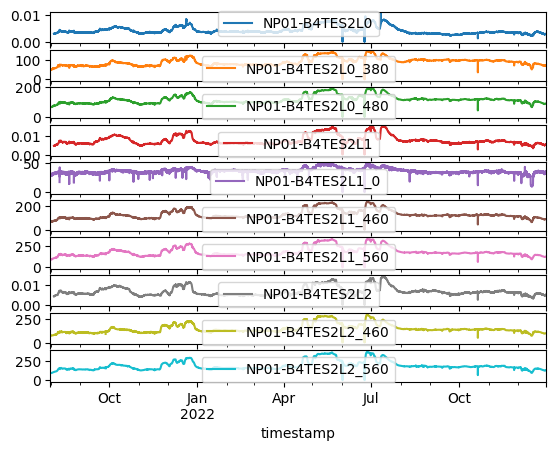

In [6]:
df.plot(subplots=True)

In [7]:
# Create interactive plot with Plotly (15-minute aggregation)
fig = create_timeseries_plot(
    df,
    plot_title="Process Tags Time Series",
    height_per_subplot=250,
    resample_rule='15min'  # 15-minute aggregation
)


In [8]:
events_df = pd.read_excel("../data/events.xlsx")
events_df['start_time'] = pd.to_datetime(events_df['start_time'])
events_df['end_time'] = pd.to_datetime(events_df['end_time'])

In [9]:
fig = add_events_to_plot(
    fig,
    events_df,
    start_col='start_time',
    end_col='end_time'
)

In [10]:
# Save plot files
saved_file = save_plot(
    fig,
    filename="process_tags_plot"
)
print(f"\nPlot saved as: {saved_file}")


Plot saved as: plots/process_tags_plot.html
